# Monte Carlo Method

## Prepare the packages

In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import sys
if "../" not in sys.path:
    sys.path.append("../") 

In [9]:
import math
from collections import defaultdict
import gym
from el_agent import ELAgent
from frozen_lake_util import show_q_value

## Define Monte Carlo Agent

In [10]:
class MonteCarloAgent(ELAgent):

    def __init__(self, epsilon=0.1):
        super().__init__(epsilon)

    def learn(self, env, episode_count=100000, gamma=0.9,
              render=False, report_interval=100):
        self.init_log()
        self.Q = defaultdict(lambda: [0] * len(actions))
        N = defaultdict(lambda: [0] * len(actions))
        actions = list(range(env.action_space.n))

        for e in range(episode_count):
            s = env.reset()
            done = False
            # Gain experience
            experience = []
            while not done:
                if render:
                    env.render()
                a = self.policy(s, actions)
                n_state, reward, done, info = env.step(a)
                experience.append(
                    {"state": s, "action": a, "reward": reward}
                )
                s = n_state
            else:
                self.log(reward)

            for i, x in enumerate(experience):
                s = x["state"]
                a = x["action"]

                # Calculate discounted future reward
                G = 0
                t = 0
                for j in range(i, len(experience)):
                    G += math.pow(gamma, t) * experience[j]["reward"]
                    t += 1

                # Count visits
                N[s][a] += 1
                alpha = 1 / N[s][a]
                # Update
                self.Q[s][a] += alpha * (G - self.Q[s][a])

            if e != 0 and e % report_interval == 0:
                self.show_reward_log(episode=e)

## Train Agent

In [14]:
def train():
    agent = MonteCarloAgent(epsilon=0.1)
    env = gym.make("FrozenLakeEasy-v0")
    agent.learn(env, episode_count=3000)
    show_q_value(agent.Q)
    agent.show_reward_log()

At Episode 100 average reward is 0.17 (+/-0.376).
At Episode 200 average reward is 0.92 (+/-0.271).
At Episode 300 average reward is 0.87 (+/-0.336).
At Episode 400 average reward is 0.92 (+/-0.271).
At Episode 500 average reward is 0.9 (+/-0.3).
At Episode 600 average reward is 0.86 (+/-0.347).
At Episode 700 average reward is 0.94 (+/-0.237).
At Episode 800 average reward is 0.93 (+/-0.255).
At Episode 900 average reward is 0.9 (+/-0.3).
At Episode 1000 average reward is 0.91 (+/-0.286).
At Episode 1100 average reward is 0.86 (+/-0.347).
At Episode 1200 average reward is 0.88 (+/-0.325).
At Episode 1300 average reward is 0.89 (+/-0.313).
At Episode 1400 average reward is 0.93 (+/-0.255).
At Episode 1500 average reward is 0.88 (+/-0.325).
At Episode 1600 average reward is 0.91 (+/-0.286).
At Episode 1700 average reward is 0.87 (+/-0.336).
At Episode 1800 average reward is 0.91 (+/-0.286).
At Episode 1900 average reward is 0.89 (+/-0.313).
At Episode 2000 average reward is 0.91 (+/-0.2

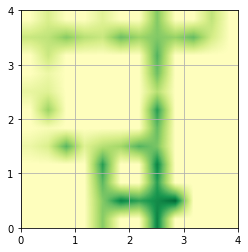

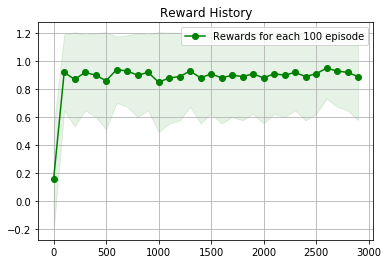

In [15]:
agent = train()